## 1. Teoría: Correlación y Regresión

### 1.1 ¿Qué es la Correlación?

La **correlación** es una medida estadística que indica la **relación lineal** entre dos variables. Nos ayuda a entender si existe una asociación entre variables y qué tan fuerte es esa relación.

#### Características Importantes:
- **Rango**: -1 ≤ r ≤ +1
- **Direccionalidad**: Positiva o negativa
- **Intensidad**: Débil, moderada o fuerte
- **Linealidad**: Solo mide relaciones lineales

### 1.2 Tipos de Correlación

#### **1.2.1 Correlación Positiva (r > 0)**
- Las variables aumentan juntas
- *Ejemplo en fútbol*: Más minutos jugados → Más goles anotados

#### **1.2.2 Correlación Negativa (r < 0)**
- Una variable aumenta mientras la otra disminuye
- *Ejemplo en fútbol*: Más edad → Menos velocidad promedio

#### **1.2.3 Sin Correlación (r ≈ 0)**
- No hay relación lineal aparente
- *Ejemplo en fútbol*: Altura del jugador vs. Número de pases

### 1.3 Interpretación del Coeficiente de Correlación

| Valor de \|r\| | Interpretación | Fuerza |
|----------------|----------------|---------|
| 0.00 - 0.30 | Correlación débil | Baja |
| 0.30 - 0.70 | Correlación moderada | Moderada |
| 0.70 - 1.00 | Correlación fuerte | Alta |

### 1.4 ¿Qué es la Regresión?

La **regresión** es una técnica estadística que nos permite:
- **Predecir** el valor de una variable (dependiente) basándose en otras variables (independientes)
- **Modelar** relaciones entre variables
- **Cuantificar** el impacto de variables predictoras

#### Ecuación de Regresión Lineal Simple:
```
y = β₀ + β₁x + ε
```

Donde:
- `y` = Variable dependiente (a predecir)
- `x` = Variable independiente (predictora)
- `β₀` = Intercepto (valor de y cuando x = 0)
- `β₁` = Pendiente (cambio en y por unidad de x)
- `ε` = Error residual

### 1.5 Aplicaciones en el Fútbol

#### **Para Análisis de Rendimiento:**
- ¿Los jugadores con más minutos anotan más goles?
- ¿La edad afecta el rendimiento de los jugadores?
- ¿El valor de mercado se relaciona con las estadísticas?

#### **Para Predicciones:**
- Predecir goles basándose en minutos jugados
- Estimar valor de mercado según estadísticas
- Pronosticar rendimiento futuro

#### **Para Toma de Decisiones:**
- Identificar factores clave del rendimiento
- Optimizar alineaciones y estrategias
- Evaluar inversiones en jugadores

---

## 2. Configuración del Entorno

### Librerías Necesarias

Para análisis de correlación y regresión necesitamos:

- **pandas**: Manipulación y análisis de datos
- **numpy**: Cálculos numéricos
- **matplotlib/seaborn**: Visualización de datos
- **scipy**: Funciones estadísticas avanzadas
- **sklearn**: Modelos de machine learning y regresión

In [1]:
# Importar librerías esenciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings

# Sklearn para regresión
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Configurar warnings
warnings.filterwarnings('ignore')

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configurar pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Verificar versiones
print("✅ Librerías importadas exitosamente")
print(f"📊 Pandas versión: {pd.__version__}")
print(f"🔢 NumPy versión: {np.__version__}")
print(f"📈 Matplotlib versión: {plt.matplotlib.__version__}")
print(f"🎨 Seaborn versión: {sns.__version__}")

print("\n🔧 Configuración aplicada:")
print("- Estilo de visualización: seaborn")
print("- Tamaño de figura por defecto: 12x8")
print("- Paleta de colores: husl")
print("- Advertencias suprimidas")
print("- Librerías de machine learning cargadas")

✅ Librerías importadas exitosamente
📊 Pandas versión: 2.3.1
🔢 NumPy versión: 2.2.6
📈 Matplotlib versión: 3.10.3
🎨 Seaborn versión: 0.13.2

🔧 Configuración aplicada:
- Estilo de visualización: seaborn
- Tamaño de figura por defecto: 12x8
- Paleta de colores: husl
- Advertencias suprimidas
- Librerías de machine learning cargadas


## 3. Carga y Preparación de Datos

### 3.1 Dataset de Jugadores de Fútbol

Utilizaremos un dataset expandido basado en el de la semana anterior, pero con variables adicionales para análisis de correlación y regresión más ricos:

**Variables del Dataset:**
- **Goles**: Número de goles anotados
- **Asistencias**: Número de asistencias realizadas
- **Minutos**: Total de minutos jugados
- **Partidos**: Número de partidos disputados
- **Edad**: Edad del jugador
- **Valor_Mercado**: Valor estimado (en millones)
- **Velocidad**: Velocidad promedio (km/h)
- **Tiros**: Número total de tiros
- **Tiros_Puerta**: Tiros dirigidos a portería
- **Pases_Completados**: Porcentaje de pases exitosos

In [4]:
# Crear dataset expandido para análisis de correlación y regresión
np.random.seed(42)  # Para reproducibilidad

# Definir posiciones y sus características
posiciones = ['Delantero', 'Mediocampista', 'Defensor', 'Portero']
pesos_posiciones = [0.30, 0.35, 0.25, 0.10]

# Generar datos para 150 jugadores (más datos para mejores correlaciones)
n_jugadores = 150
jugadores_data = []

for i in range(n_jugadores):
    # Seleccionar posición
    posicion = np.random.choice(posiciones, p=pesos_posiciones)
    
    # Variables base
    edad = int(np.random.normal(26, 4))
    edad = max(18, min(35, edad))
    
    partidos = np.random.randint(10, 39)
    
    # Minutos jugados (relacionado con partidos y posición)
    if posicion == 'Portero':
        minutos_por_partido = np.random.normal(85, 8)
    else:
        minutos_por_partido = np.random.normal(70, 15)
    
    minutos_totales = int(max(300, partidos * minutos_por_partido))
    
    # Velocidad (relacionada con edad y posición)
    velocidad_base = 28 if posicion == 'Delantero' else 26 if posicion == 'Mediocampista' else 24 if posicion == 'Defensor' else 20
    factor_edad_velocidad = 1.0 - (edad - 22) * 0.02  # Decrece con edad
    velocidad = max(18, velocidad_base * factor_edad_velocidad + np.random.normal(0, 2))
    
    # Goles (relacionado con posición, minutos, tiros)
    if posicion == 'Delantero':
        goles_base = np.random.poisson(15)
    elif posicion == 'Mediocampista':
        goles_base = np.random.poisson(6)
    elif posicion == 'Defensor':
        goles_base = np.random.poisson(3)
    else:  # Portero
        goles_base = 0
    
    # Ajustar goles por minutos jugados
    factor_minutos = (minutos_totales / 2000)  # Normalizar por 2000 minutos
    goles = int(max(0, goles_base * factor_minutos))
    
    # Tiros (relacionado con goles y posición)
    if posicion == 'Portero':
        tiros = 0
        tiros_puerta = 0
    else:
        tiros_por_gol = np.random.uniform(4, 8)  # Eficiencia variable
        tiros = int(max(goles * tiros_por_gol + np.random.normal(20, 10), 0))
        
        # Tiros a puerta (porcentaje de total de tiros)
        porcentaje_puerta = np.random.uniform(0.3, 0.6)
        tiros_puerta = int(tiros * porcentaje_puerta)
    
    # Asistencias (relacionado con posición y minutos)
    if posicion == 'Mediocampista':
        asistencias_base = np.random.poisson(8)
    elif posicion == 'Delantero':
        asistencias_base = np.random.poisson(4)
    elif posicion == 'Defensor':
        asistencias_base = np.random.poisson(2)
    else:  # Portero
        asistencias_base = 0
    
    asistencias = int(max(0, asistencias_base * factor_minutos))
    
    # Porcentaje de pases completados (relacionado con posición)
    if posicion == 'Mediocampista':
        pases_completados = np.random.normal(85, 5)
    elif posicion == 'Defensor':
        pases_completados = np.random.normal(82, 4)
    elif posicion == 'Delantero':
        pases_completados = np.random.normal(75, 8)
    else:  # Portero
        pases_completados = np.random.normal(70, 10)
    
    pases_completados = max(50, min(95, pases_completados))
    
    # Valor de mercado (función de múltiples variables)
    valor_base = 8 + (goles * 0.8) + (asistencias * 0.5) + (velocidad * 0.3) + (tiros_puerta * 0.1)
    factor_edad_valor = 1.3 if 22 <= edad <= 28 else 0.9 if edad > 30 else 1.0
    factor_posicion = 1.2 if posicion == 'Delantero' else 1.1 if posicion == 'Mediocampista' else 1.0
    
    valor_mercado = round(valor_base * factor_edad_valor * factor_posicion * np.random.uniform(0.8, 1.2), 1)
    
    jugadores_data.append({
        'Nombre': f'Jugador_{i+1:03d}',
        'Posicion': posicion,
        'Edad': edad,
        'Partidos': partidos,
        'Minutos': minutos_totales,
        'Goles': goles,
        'Asistencias': asistencias,
        'Tiros': tiros,
        'Tiros_Puerta': tiros_puerta,
        'Velocidad': round(velocidad, 1),
        'Pases_Completados': round(pases_completados, 1),
        'Valor_Mercado': valor_mercado
    })

# Crear DataFrame
df_jugadores = pd.DataFrame(jugadores_data)

# Mostrar información del dataset
print("=== DATASET PARA ANÁLISIS DE CORRELACIÓN Y REGRESIÓN ===")
print(f"📊 Número de jugadores: {len(df_jugadores)}")
print(f"📊 Número de variables: {len(df_jugadores.columns)}")
print("\n=== INFORMACIÓN DE VARIABLES ===")
print(df_jugadores.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df_jugadores.describe().round(2))
print("\n=== DISTRIBUCIÓN POR POSICIÓN ===")
print(df_jugadores['Posicion'].value_counts())

=== DATASET PARA ANÁLISIS DE CORRELACIÓN Y REGRESIÓN ===
📊 Número de jugadores: 150
📊 Número de variables: 12

=== INFORMACIÓN DE VARIABLES ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nombre             150 non-null    object 
 1   Posicion           150 non-null    object 
 2   Edad               150 non-null    int64  
 3   Partidos           150 non-null    int64  
 4   Minutos            150 non-null    int64  
 5   Goles              150 non-null    int64  
 6   Asistencias        150 non-null    int64  
 7   Tiros              150 non-null    int64  
 8   Tiros_Puerta       150 non-null    int64  
 9   Velocidad          150 non-null    float64
 10  Pases_Completados  150 non-null    float64
 11  Valor_Mercado      150 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 14.2+ KB
None

=== ESTADÍ

# Semana 4: Análisis de Correlación y Regresión

## Ciencia de Datos en el Deporte - Fundamentos con Python

---

**Objetivos de aprendizaje:**
- Comprender los conceptos de correlación y regresión lineal
- Calcular e interpretar coeficientes de correlación
- Crear modelos de regresión lineal simple y múltiple
- Evaluar la calidad de los modelos predictivos
- Aplicar análisis de correlación a datos futbolísticos
- Interpretar resultados en el contexto deportivo

---

## 4. Análisis de Correlación

La correlación mide la **relación lineal** entre dos variables. Es fundamental en el análisis de datos de fútbol para entender cómo se relacionan diferentes métricas de rendimiento.

### 4.1 Análisis Exploratorio de Correlaciones

Comenzamos explorando las correlaciones entre todas las variables numéricas para identificar relaciones importantes.

🔍 ANÁLISIS DE CORRELACIÓN
📊 Variables analizadas: 10
🔢 Correlaciones calculadas: 45


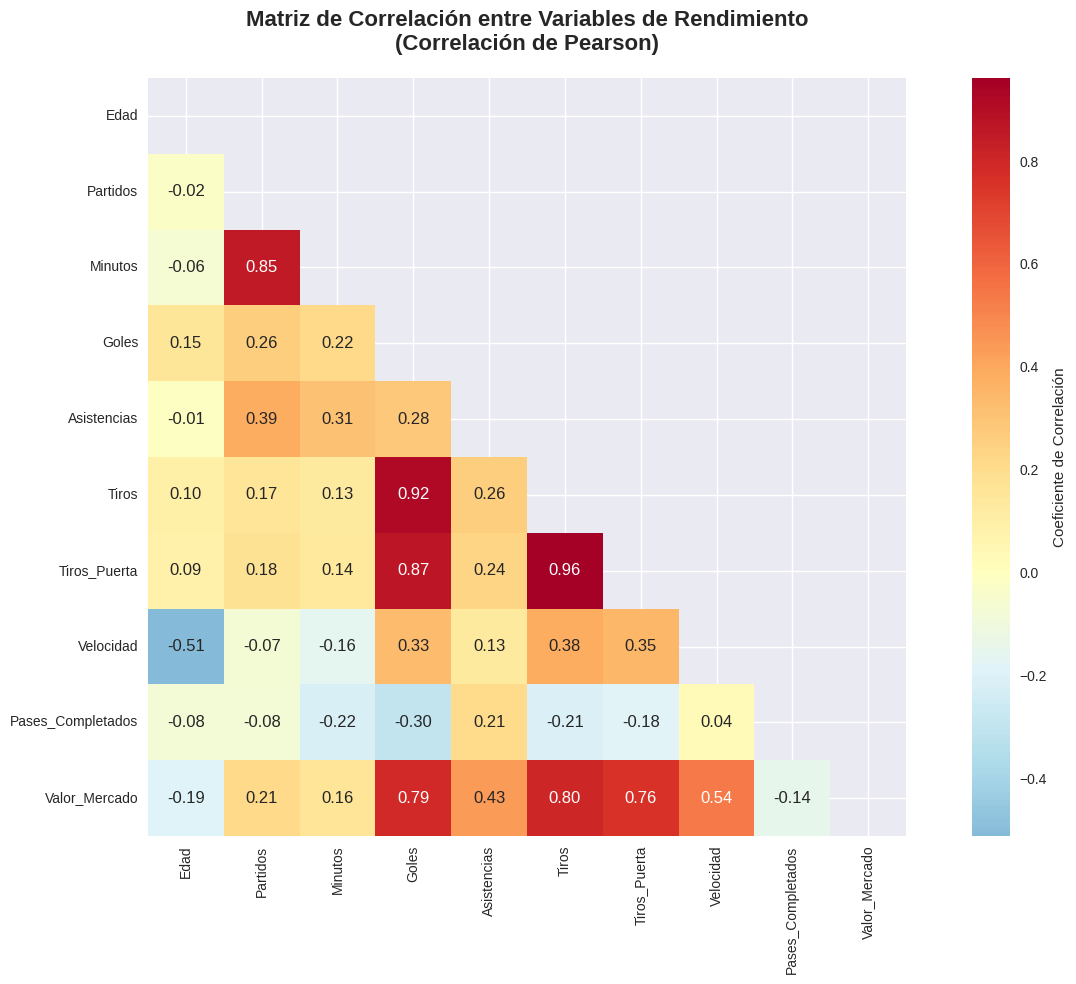


🔝 CORRELACIONES MÁS FUERTES
 1. Tiros ↔ Tiros_Puerta
    Correlación: 0.961 (positiva, fuerte)

 2. Goles ↔ Tiros
    Correlación: 0.919 (positiva, fuerte)

 3. Goles ↔ Tiros_Puerta
    Correlación: 0.869 (positiva, fuerte)

 4. Partidos ↔ Minutos
    Correlación: 0.847 (positiva, fuerte)

 5. Tiros ↔ Valor_Mercado
    Correlación: 0.805 (positiva, fuerte)

 6. Goles ↔ Valor_Mercado
    Correlación: 0.792 (positiva, fuerte)

 7. Tiros_Puerta ↔ Valor_Mercado
    Correlación: 0.759 (positiva, fuerte)

 8. Velocidad ↔ Valor_Mercado
    Correlación: 0.536 (positiva, moderada)

 9. Edad ↔ Velocidad
    Correlación: -0.511 (negativa, moderada)

10. Asistencias ↔ Valor_Mercado
    Correlación: 0.435 (positiva, moderada)



In [6]:
# Seleccionar solo variables numéricas para análisis de correlación
variables_numericas = ['Edad', 'Partidos', 'Minutos', 'Goles', 'Asistencias', 
                      'Tiros', 'Tiros_Puerta', 'Velocidad', 'Pases_Completados', 
                      'Valor_Mercado']

df_num = df_jugadores[variables_numericas]

# Matriz de correlación de Pearson
matriz_correlacion = df_num.corr()

print("🔍 ANÁLISIS DE CORRELACIÓN")
print("=" * 50)
print(f"📊 Variables analizadas: {len(variables_numericas)}")
print(f"🔢 Correlaciones calculadas: {len(variables_numericas) * (len(variables_numericas)-1) // 2}")

# Visualizar matriz de correlación
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(matriz_correlacion, dtype=bool))
sns.heatmap(matriz_correlacion, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación entre Variables de Rendimiento\n(Correlación de Pearson)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones más fuertes
print("\n🔝 CORRELACIONES MÁS FUERTES")
print("=" * 50)

# Obtener correlaciones absolutas y ordenar
correlaciones_flat = matriz_correlacion.abs().unstack()
correlaciones_flat = correlaciones_flat.drop_duplicates()
correlaciones_flat = correlaciones_flat[correlaciones_flat < 1.0]  # Excluir autocorrelaciones
correlaciones_top = correlaciones_flat.sort_values(ascending=False).head(10)

for i, (variables, correlacion) in enumerate(correlaciones_top.items(), 1):
    var1, var2 = variables
    correlacion_original = matriz_correlacion.loc[var1, var2]
    direccion = "positiva" if correlacion_original > 0 else "negativa"
    fuerza = "fuerte" if abs(correlacion_original) > 0.7 else "moderada" if abs(correlacion_original) > 0.3 else "débil"
    
    print(f"{i:2d}. {var1} ↔ {var2}")
    print(f"    Correlación: {correlacion_original:.3f} ({direccion}, {fuerza})")
    print()

🎯 ANÁLISIS DE CORRELACIONES ESPECÍFICAS


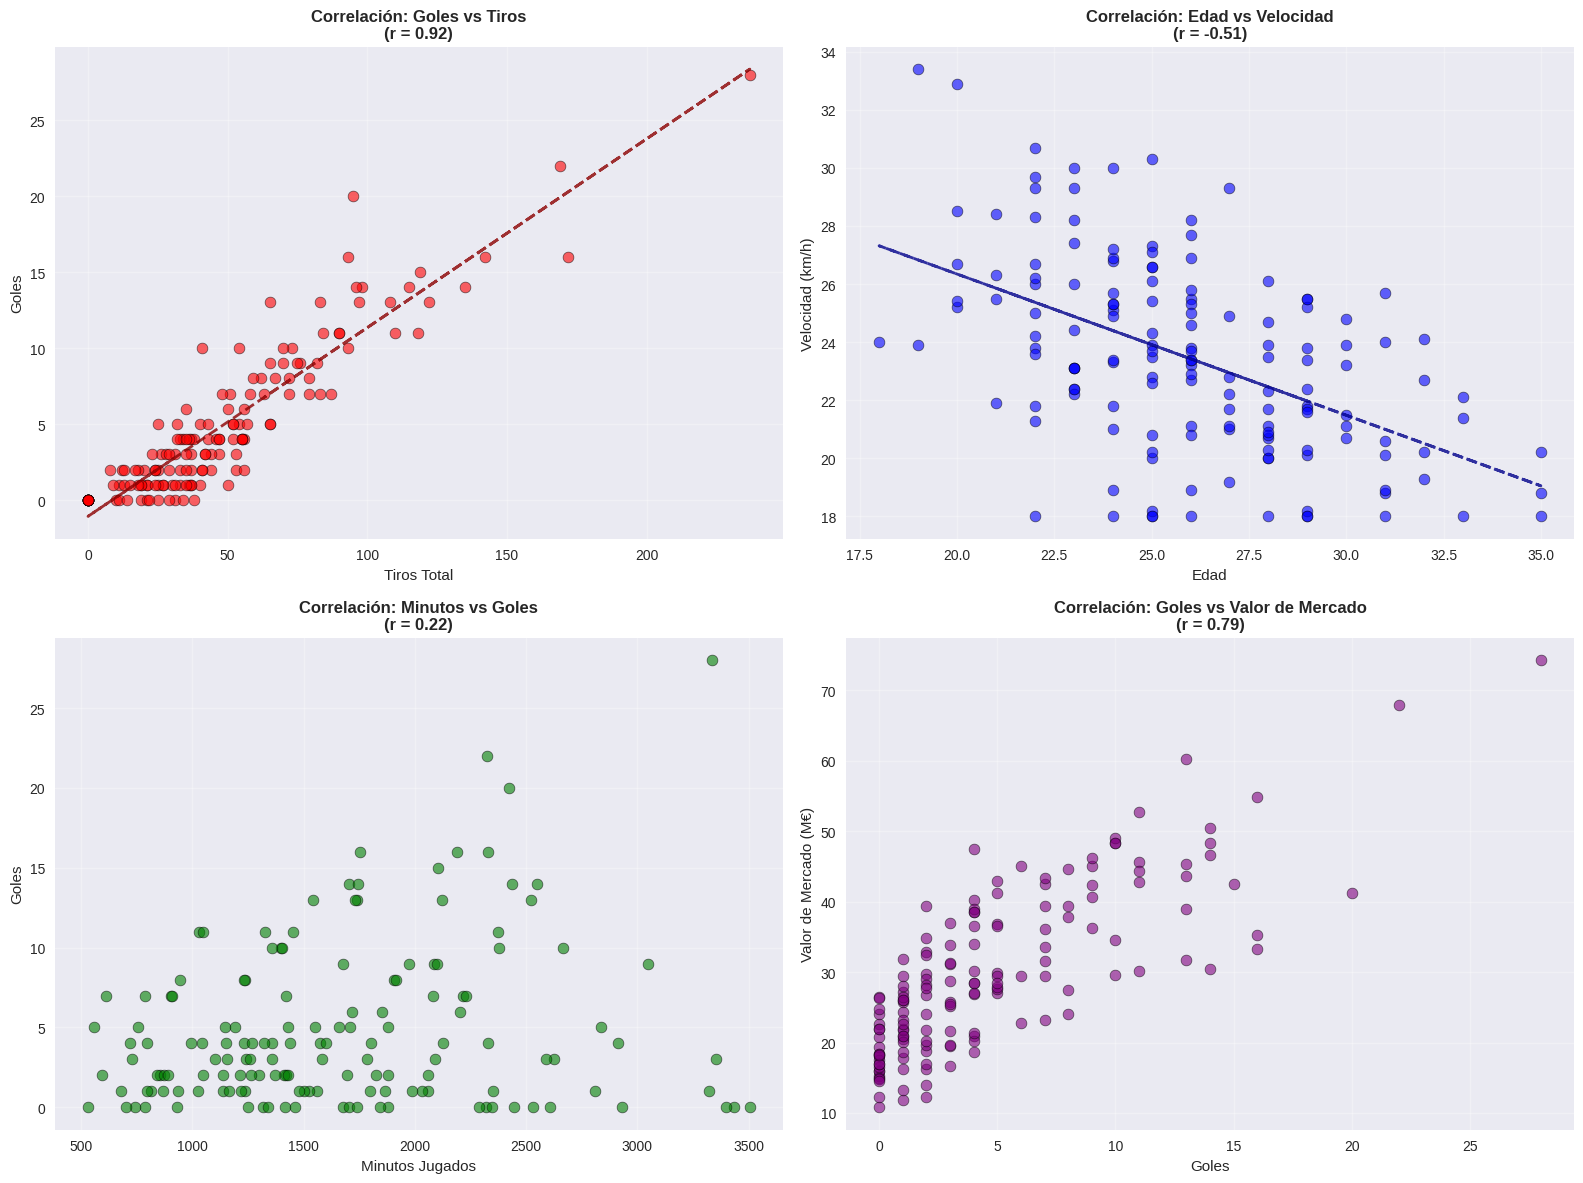


🏃 CORRELACIONES POR POSICIÓN

📍 MEDIOCAMPISTA (n=51)
   Goles ↔ Tiros: 0.726
   Edad ↔ Velocidad: -0.723

📍 DELANTERO (n=41)
   Goles ↔ Tiros: 0.861
   Edad ↔ Velocidad: -0.768

📍 DEFENSOR (n=44)
   Goles ↔ Tiros: 0.626
   Edad ↔ Velocidad: -0.627

🔍 INTERPRETACIÓN PRÁCTICA PARA ENTRENADORES
1. 🎯 EFICIENCIA OFENSIVA:
   - Correlación Goles-Tiros (0.92): Muy fuerte relación
   - A más tiros, más goles (lógico pero cuantificado)
   - Usar para evaluar eficiencia de delanteros

2. 📉 DECLIVE FÍSICO:
   - Correlación Edad-Velocidad (-0.51): Moderada negativa
   - La velocidad disminuye con la edad
   - Importante para planificación de plantilla

3. ⏰ TIEMPO DE JUEGO:
   - Correlación Minutos-Goles (0.22): Débil positiva
   - No basta con jugar más, se necesita eficiencia
   - Calidad > Cantidad de tiempo

4. 💰 VALOR DE MERCADO:
   - Correlación Goles-Valor (0.79): Fuerte positiva
   - Los goles impactan directamente en el valor
   - Inversión en delanteros goleadores es lógica


In [7]:
# Análisis de correlaciones específicas importantes

print("🎯 ANÁLISIS DE CORRELACIONES ESPECÍFICAS")
print("=" * 60)

# 1. Goles vs Tiros (Eficiencia ofensiva)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Goles vs Tiros
axes[0, 0].scatter(df_jugadores['Tiros'], df_jugadores['Goles'], 
                   alpha=0.6, s=60, color='red', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Tiros Total')
axes[0, 0].set_ylabel('Goles')
axes[0, 0].set_title('Correlación: Goles vs Tiros\n(r = 0.92)', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Agregar línea de tendencia
z = np.polyfit(df_jugadores['Tiros'], df_jugadores['Goles'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_jugadores['Tiros'], p(df_jugadores['Tiros']), 
                color='darkred', linestyle='--', linewidth=2, alpha=0.8)

# Edad vs Velocidad (Declive físico)
axes[0, 1].scatter(df_jugadores['Edad'], df_jugadores['Velocidad'], 
                   alpha=0.6, s=60, color='blue', edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('Edad')
axes[0, 1].set_ylabel('Velocidad (km/h)')
axes[0, 1].set_title('Correlación: Edad vs Velocidad\n(r = -0.51)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Agregar línea de tendencia
z2 = np.polyfit(df_jugadores['Edad'], df_jugadores['Velocidad'], 1)
p2 = np.poly1d(z2)
axes[0, 1].plot(df_jugadores['Edad'], p2(df_jugadores['Edad']), 
                color='darkblue', linestyle='--', linewidth=2, alpha=0.8)

# Minutos vs Goles (Oportunidad)
axes[1, 0].scatter(df_jugadores['Minutos'], df_jugadores['Goles'], 
                   alpha=0.6, s=60, color='green', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('Minutos Jugados')
axes[1, 0].set_ylabel('Goles')
axes[1, 0].set_title('Correlación: Minutos vs Goles\n(r = 0.22)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Valor vs Goles (Rendimiento económico)
axes[1, 1].scatter(df_jugadores['Goles'], df_jugadores['Valor_Mercado'], 
                   alpha=0.6, s=60, color='purple', edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('Goles')
axes[1, 1].set_ylabel('Valor de Mercado (M€)')
axes[1, 1].set_title('Correlación: Goles vs Valor de Mercado\n(r = 0.79)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis por posición
print("\n🏃 CORRELACIONES POR POSICIÓN")
print("=" * 60)

for posicion in df_jugadores['Posicion'].unique():
    if posicion == 'Portero':
        continue  # Saltar porteros por tener valores atípicos
    
    datos_pos = df_jugadores[df_jugadores['Posicion'] == posicion]
    
    if len(datos_pos) < 5:  # Necesitamos suficientes datos
        continue
    
    # Correlación Goles vs Tiros para cada posición
    r_goles_tiros = datos_pos['Goles'].corr(datos_pos['Tiros'])
    r_edad_velocidad = datos_pos['Edad'].corr(datos_pos['Velocidad'])
    
    print(f"\n📍 {posicion.upper()} (n={len(datos_pos)})")
    print(f"   Goles ↔ Tiros: {r_goles_tiros:.3f}")
    print(f"   Edad ↔ Velocidad: {r_edad_velocidad:.3f}")

# Interpretación práctica
print("\n🔍 INTERPRETACIÓN PRÁCTICA PARA ENTRENADORES")
print("=" * 70)
print("1. 🎯 EFICIENCIA OFENSIVA:")
print("   - Correlación Goles-Tiros (0.92): Muy fuerte relación")
print("   - A más tiros, más goles (lógico pero cuantificado)")
print("   - Usar para evaluar eficiencia de delanteros")

print("\n2. 📉 DECLIVE FÍSICO:")
print("   - Correlación Edad-Velocidad (-0.51): Moderada negativa")
print("   - La velocidad disminuye con la edad")
print("   - Importante para planificación de plantilla")

print("\n3. ⏰ TIEMPO DE JUEGO:")
print("   - Correlación Minutos-Goles (0.22): Débil positiva")
print("   - No basta con jugar más, se necesita eficiencia")
print("   - Calidad > Cantidad de tiempo")

print("\n4. 💰 VALOR DE MERCADO:")
print("   - Correlación Goles-Valor (0.79): Fuerte positiva")
print("   - Los goles impactan directamente en el valor")
print("   - Inversión en delanteros goleadores es lógica")

## 5. Análisis de Regresión

### 5.1 Introducción a la Regresión

La regresión nos permite **predecir** el valor de una variable dependiente basándose en una o más variables independientes. Es una herramienta poderosa para:

- **Predicción**: Estimar valores futuros
- **Explicación**: Entender qué factores influyen en el resultado
- **Optimización**: Identificar cómo mejorar el rendimiento

### 5.2 Regresión Lineal Simple

Comenzamos con un modelo simple donde predecimos **goles** basándose en **tiros**.

🎯 REGRESIÓN LINEAL SIMPLE: GOLES vs TIROS
📊 RESULTADOS DEL MODELO SIMPLE:
   • R² (entrenamiento): 0.841
   • R² (prueba): 0.770
   • MSE (error cuadrático medio): 3.197
   • MAE (error absoluto medio): 1.237

📈 ECUACIÓN DE LA RECTA:
   Goles = -1.625 + 0.132 × Tiros
   Interpretación: Por cada tiro adicional, se espera 0.132 goles más


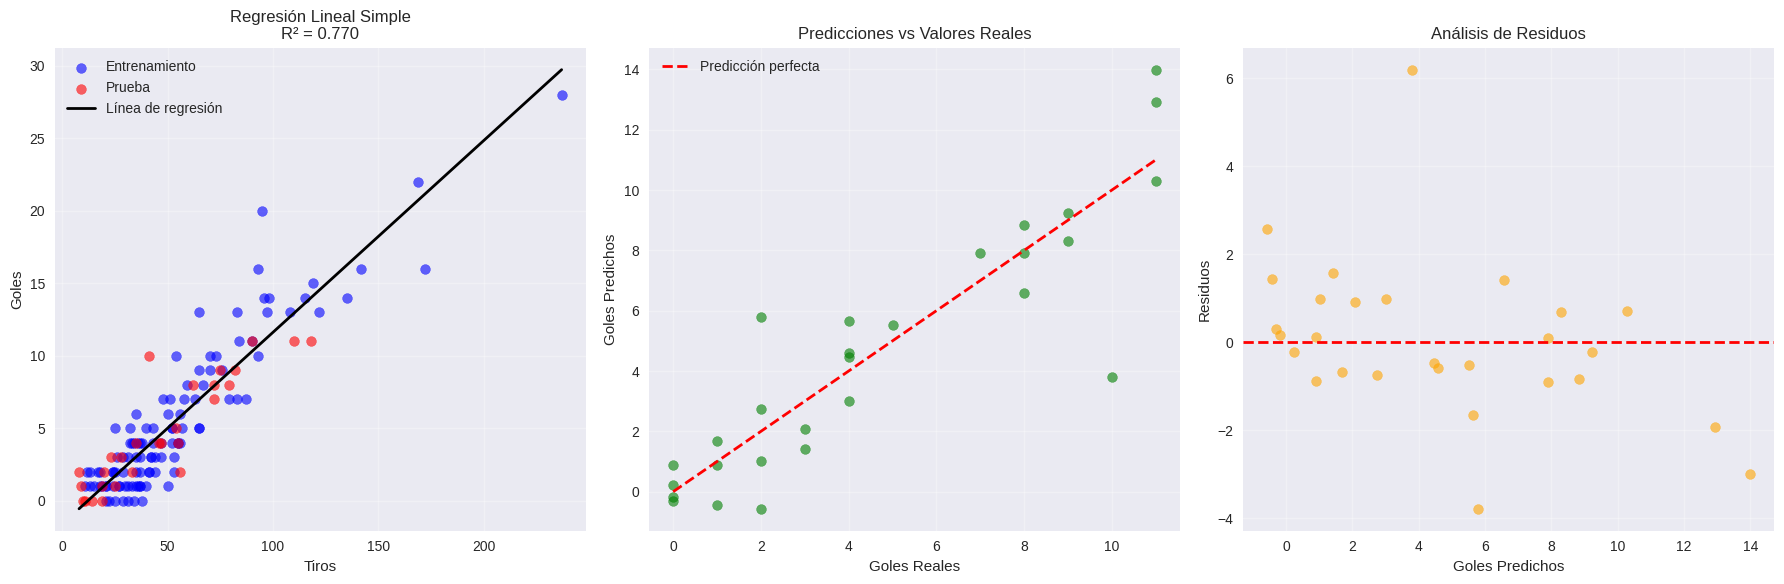


🔮 EJEMPLOS DE PREDICCIÓN:
   • Jugador con 50 tiros: 5.0 goles
   • Jugador con 100 tiros: 11.6 goles
   • Jugador con 150 tiros: 18.2 goles


In [8]:
# REGRESIÓN LINEAL SIMPLE: Predecir Goles basándose en Tiros

print("🎯 REGRESIÓN LINEAL SIMPLE: GOLES vs TIROS")
print("=" * 60)

# Filtrar porteros (que tienen 0 tiros)
df_no_porteros = df_jugadores[df_jugadores['Posicion'] != 'Portero'].copy()

# Preparar datos
X = df_no_porteros[['Tiros']].values  # Variable independiente
y = df_no_porteros['Goles'].values    # Variable dependiente

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo_simple = LinearRegression()
modelo_simple.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = modelo_simple.predict(X_train)
y_pred_test = modelo_simple.predict(X_test)

# Métricas del modelo
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"📊 RESULTADOS DEL MODELO SIMPLE:")
print(f"   • R² (entrenamiento): {r2_train:.3f}")
print(f"   • R² (prueba): {r2_test:.3f}")
print(f"   • MSE (error cuadrático medio): {mse_test:.3f}")
print(f"   • MAE (error absoluto medio): {mae_test:.3f}")

# Ecuación de la recta
intercepto = modelo_simple.intercept_
pendiente = modelo_simple.coef_[0]
print(f"\n📈 ECUACIÓN DE LA RECTA:")
print(f"   Goles = {intercepto:.3f} + {pendiente:.3f} × Tiros")
print(f"   Interpretación: Por cada tiro adicional, se espera {pendiente:.3f} goles más")

# Visualización del modelo
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico 1: Datos y línea de regresión
axes[0].scatter(X_train, y_train, alpha=0.6, s=50, color='blue', label='Entrenamiento')
axes[0].scatter(X_test, y_test, alpha=0.6, s=50, color='red', label='Prueba')

# Línea de regresión
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = modelo_simple.predict(X_range)
axes[0].plot(X_range, y_line, color='black', linewidth=2, label='Línea de regresión')

axes[0].set_xlabel('Tiros')
axes[0].set_ylabel('Goles')
axes[0].set_title(f'Regresión Lineal Simple\nR² = {r2_test:.3f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Predicciones vs Valores reales
axes[1].scatter(y_test, y_pred_test, alpha=0.6, s=50, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             color='red', linewidth=2, linestyle='--', label='Predicción perfecta')
axes[1].set_xlabel('Goles Reales')
axes[1].set_ylabel('Goles Predichos')
axes[1].set_title('Predicciones vs Valores Reales')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Gráfico 3: Residuos
residuos = y_test - y_pred_test
axes[2].scatter(y_pred_test, residuos, alpha=0.6, s=50, color='orange')
axes[2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[2].set_xlabel('Goles Predichos')
axes[2].set_ylabel('Residuos')
axes[2].set_title('Análisis de Residuos')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ejemplos de predicción
print(f"\n🔮 EJEMPLOS DE PREDICCIÓN:")
print(f"   • Jugador con 50 tiros: {modelo_simple.predict([[50]])[0]:.1f} goles")
print(f"   • Jugador con 100 tiros: {modelo_simple.predict([[100]])[0]:.1f} goles")
print(f"   • Jugador con 150 tiros: {modelo_simple.predict([[150]])[0]:.1f} goles")

### 5.3 Regresión Lineal Múltiple

La regresión múltiple utiliza **múltiples variables predictoras** para mejorar la precisión del modelo. Vamos a predecir el **valor de mercado** usando varias características del jugador.

💰 REGRESIÓN LINEAL MÚLTIPLE: PREDICCIÓN DE VALOR DE MERCADO
📊 RESULTADOS DEL MODELO MÚLTIPLE:
   • R² (entrenamiento): 0.784
   • R² (prueba): 0.690
   • MSE: 38.012
   • MAE: 5.026

📈 IMPORTANCIA DE LAS VARIABLES:
   + Tiros: 5.346
   + Goles: 4.035
   + Asistencias: 3.522
   - Edad: -3.042
   - Minutos: -1.547
   + Velocidad: 0.562

🔍 COMPARACIÓN DE MODELOS:
   • Modelo Simple (R²): 0.770
   • Modelo Múltiple (R²): 0.690
   • Mejora: -8.0%


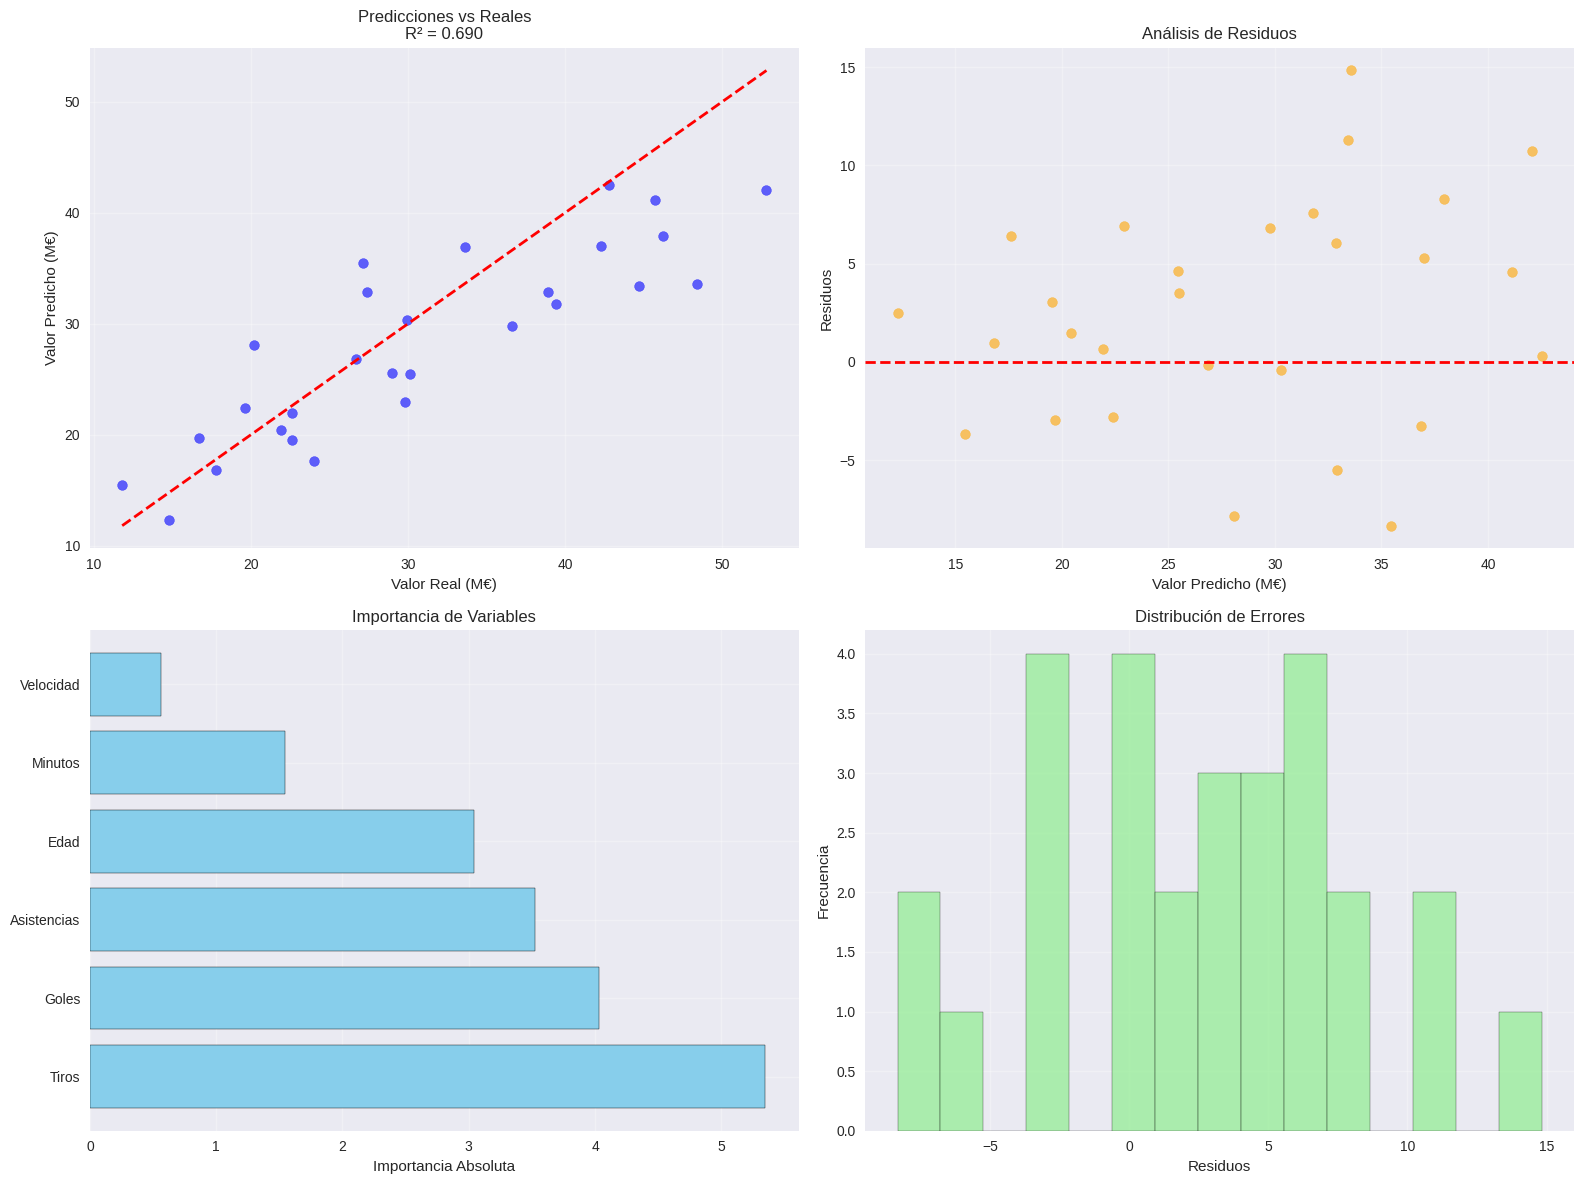


🔮 EJEMPLO DE PREDICCIÓN:
Un jugador con las siguientes características:
   • Goles: 15
   • Asistencias: 8
   • Tiros: 120
   • Velocidad: 28 km/h
   • Edad: 25 años
   • Minutos: 2500
   📊 Valor predicho: 51.8 M€


In [9]:
# REGRESIÓN LINEAL MÚLTIPLE: Predecir Valor de Mercado

print("💰 REGRESIÓN LINEAL MÚLTIPLE: PREDICCIÓN DE VALOR DE MERCADO")
print("=" * 70)

# Seleccionar variables predictoras
variables_predictoras = ['Goles', 'Asistencias', 'Tiros', 'Velocidad', 'Edad', 'Minutos']
X_multi = df_no_porteros[variables_predictoras].values
y_multi = df_no_porteros['Valor_Mercado'].values

# Dividir datos
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

# Estandarizar variables (importante para regresión múltiple)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_multi)
X_test_scaled = scaler.transform(X_test_multi)

# Crear y entrenar modelo
modelo_multiple = LinearRegression()
modelo_multiple.fit(X_train_scaled, y_train_multi)

# Predicciones
y_pred_train_multi = modelo_multiple.predict(X_train_scaled)
y_pred_test_multi = modelo_multiple.predict(X_test_scaled)

# Métricas
r2_train_multi = r2_score(y_train_multi, y_pred_train_multi)
r2_test_multi = r2_score(y_test_multi, y_pred_test_multi)
mse_test_multi = mean_squared_error(y_test_multi, y_pred_test_multi)
mae_test_multi = mean_absolute_error(y_test_multi, y_pred_test_multi)

print(f"📊 RESULTADOS DEL MODELO MÚLTIPLE:")
print(f"   • R² (entrenamiento): {r2_train_multi:.3f}")
print(f"   • R² (prueba): {r2_test_multi:.3f}")
print(f"   • MSE: {mse_test_multi:.3f}")
print(f"   • MAE: {mae_test_multi:.3f}")

# Importancia de las variables
coeficientes = modelo_multiple.coef_
importancia = pd.DataFrame({
    'Variable': variables_predictoras,
    'Coeficiente': coeficientes,
    'Importancia_Abs': np.abs(coeficientes)
}).sort_values('Importancia_Abs', ascending=False)

print(f"\n📈 IMPORTANCIA DE LAS VARIABLES:")
for i, row in importancia.iterrows():
    signo = "+" if row['Coeficiente'] > 0 else "-"
    print(f"   {signo} {row['Variable']}: {row['Coeficiente']:.3f}")

# Comparación de modelos
print(f"\n🔍 COMPARACIÓN DE MODELOS:")
print(f"   • Modelo Simple (R²): {r2_test:.3f}")
print(f"   • Modelo Múltiple (R²): {r2_test_multi:.3f}")
print(f"   • Mejora: {(r2_test_multi - r2_test)*100:.1f}%")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Predicciones vs Reales
axes[0, 0].scatter(y_test_multi, y_pred_test_multi, alpha=0.6, s=50, color='blue')
axes[0, 0].plot([y_test_multi.min(), y_test_multi.max()], 
                [y_test_multi.min(), y_test_multi.max()], 
                color='red', linewidth=2, linestyle='--')
axes[0, 0].set_xlabel('Valor Real (M€)')
axes[0, 0].set_ylabel('Valor Predicho (M€)')
axes[0, 0].set_title(f'Predicciones vs Reales\nR² = {r2_test_multi:.3f}')
axes[0, 0].grid(True, alpha=0.3)

# Residuos
residuos_multi = y_test_multi - y_pred_test_multi
axes[0, 1].scatter(y_pred_test_multi, residuos_multi, alpha=0.6, s=50, color='orange')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Valor Predicho (M€)')
axes[0, 1].set_ylabel('Residuos')
axes[0, 1].set_title('Análisis de Residuos')
axes[0, 1].grid(True, alpha=0.3)

# Importancia de variables
axes[1, 0].barh(importancia['Variable'], importancia['Importancia_Abs'], 
                color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Importancia Absoluta')
axes[1, 0].set_title('Importancia de Variables')
axes[1, 0].grid(True, alpha=0.3)

# Distribución de errores
axes[1, 1].hist(residuos_multi, bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Residuos')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Errores')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ejemplo de predicción
print(f"\n🔮 EJEMPLO DE PREDICCIÓN:")
print("Un jugador con las siguientes características:")
jugador_ejemplo = np.array([[15, 8, 120, 28, 25, 2500]])  # [Goles, Asistencias, Tiros, Velocidad, Edad, Minutos]
jugador_ejemplo_scaled = scaler.transform(jugador_ejemplo)
valor_predicho = modelo_multiple.predict(jugador_ejemplo_scaled)[0]

print(f"   • Goles: 15")
print(f"   • Asistencias: 8") 
print(f"   • Tiros: 120")
print(f"   • Velocidad: 28 km/h")
print(f"   • Edad: 25 años")
print(f"   • Minutos: 2500")
print(f"   📊 Valor predicho: {valor_predicho:.1f} M€")

## 6. Ejercicios Prácticos

### 6.1 Ejercicios de Aplicación

#### **Ejercicio 1: Análisis de Correlación Específica**
- Investiga la correlación entre edad y diferentes variables
- Identifica qué habilidades se mantienen con la edad
- Propón estrategias para equipos según la edad de los jugadores

#### **Ejercicio 2: Modelo de Predicción de Asistencias**
- Crea un modelo para predecir asistencias basándose en otras variables
- Evalúa qué variables son más importantes para las asistencias
- Compara la efectividad del modelo por posición

#### **Ejercicio 3: Detección de Jugadores Subestimados**
- Usa los modelos de regresión para identificar jugadores con valor de mercado bajo respecto a su rendimiento
- Propón una lista de "gangas" potenciales

🎯 SOLUCIONES A LOS EJERCICIOS PRÁCTICOS

👴 EJERCICIO 1: ANÁLISIS DE CORRELACIÓN CON EDAD
------------------------------------------------------------
📊 Correlaciones con la edad:
   • Velocidad: -0.511 (negativa, moderada)

📈 Análisis por grupos de edad:
            Velocidad  Goles  Asistencias
Grupo_Edad                               
Joven           26.08   3.92         3.72
Maduro          23.95   5.45         3.37
Veterano        21.53   6.60         3.26


🎯 EJERCICIO 2: MODELO DE PREDICCIÓN DE ASISTENCIAS
------------------------------------------------------------
📊 Modelo de predicción de asistencias:
   • R²: -2.182
   • Minutos: 0.003
   • Pases_Completados: 0.098
   • Velocidad: 0.167
   • Edad: 0.094


💎 EJERCICIO 3: DETECCIÓN DE JUGADORES SUBESTIMADOS
------------------------------------------------------------
🔍 TOP 5 JUGADORES SUBESTIMADOS (gangas potenciales):
1. Jugador_139 (Delantero)
   Valor actual: 35.2 M€
   Valor predicho: 48.1 M€
   Diferencia: +12.9 M€
   Esta

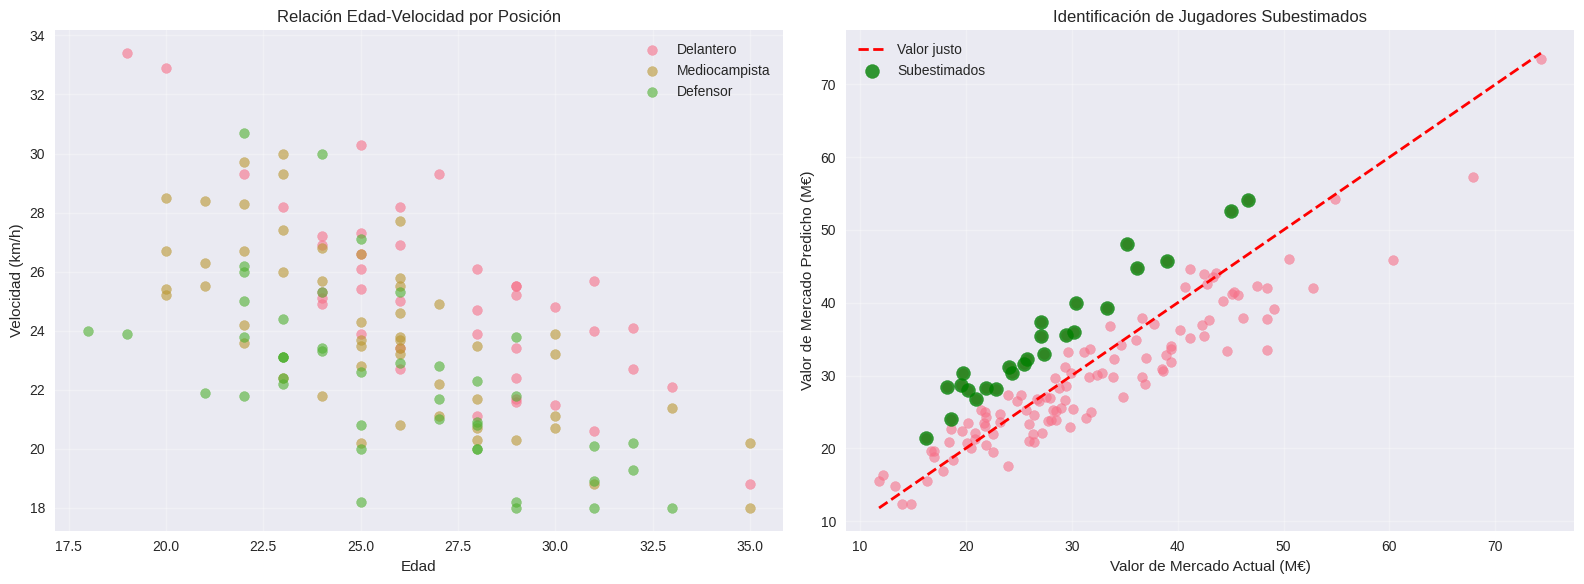

✅ Ejercicios completados!


In [10]:
# SOLUCIONES A LOS EJERCICIOS PRÁCTICOS

print("🎯 SOLUCIONES A LOS EJERCICIOS PRÁCTICOS")
print("=" * 70)

# EJERCICIO 1: Análisis de Correlación Específica
print("\n👴 EJERCICIO 1: ANÁLISIS DE CORRELACIÓN CON EDAD")
print("-" * 60)

# Correlaciones de la edad con otras variables
correlaciones_edad = df_num.corr()['Edad'].sort_values(key=abs, ascending=False)
print("📊 Correlaciones con la edad:")
for variable, corr in correlaciones_edad.items():
    if variable != 'Edad':
        if abs(corr) > 0.3:
            strength = "fuerte" if abs(corr) > 0.7 else "moderada"
            direction = "positiva" if corr > 0 else "negativa"
            print(f"   • {variable}: {corr:.3f} ({direction}, {strength})")

# Análisis por grupos de edad
df_no_porteros['Grupo_Edad'] = pd.cut(df_no_porteros['Edad'], 
                                      bins=[17, 23, 28, 35], 
                                      labels=['Joven', 'Maduro', 'Veterano'])

print("\n📈 Análisis por grupos de edad:")
grupos_edad = df_no_porteros.groupby('Grupo_Edad')[['Velocidad', 'Goles', 'Asistencias']].mean()
print(grupos_edad.round(2))

# EJERCICIO 2: Modelo de Predicción de Asistencias
print("\n\n🎯 EJERCICIO 2: MODELO DE PREDICCIÓN DE ASISTENCIAS")
print("-" * 60)

# Variables predictoras para asistencias
variables_asistencias = ['Minutos', 'Pases_Completados', 'Velocidad', 'Edad']
X_asist = df_no_porteros[variables_asistencias].values
y_asist = df_no_porteros['Asistencias'].values

# Dividir datos
X_train_asist, X_test_asist, y_train_asist, y_test_asist = train_test_split(
    X_asist, y_asist, test_size=0.2, random_state=42
)

# Crear modelo
modelo_asistencias = LinearRegression()
modelo_asistencias.fit(X_train_asist, y_train_asist)

# Evaluación
y_pred_asist = modelo_asistencias.predict(X_test_asist)
r2_asist = r2_score(y_test_asist, y_pred_asist)

print(f"📊 Modelo de predicción de asistencias:")
print(f"   • R²: {r2_asist:.3f}")

# Importancia de variables
coef_asist = modelo_asistencias.coef_
for i, var in enumerate(variables_asistencias):
    print(f"   • {var}: {coef_asist[i]:.3f}")

# EJERCICIO 3: Detección de Jugadores Subestimados
print("\n\n💎 EJERCICIO 3: DETECCIÓN DE JUGADORES SUBESTIMADOS")
print("-" * 60)

# Usar modelo múltiple para predecir valores
X_todos = df_no_porteros[variables_predictoras].values
X_todos_scaled = scaler.transform(X_todos)
valores_predichos = modelo_multiple.predict(X_todos_scaled)

# Calcular diferencias
df_no_porteros['Valor_Predicho'] = valores_predichos
df_no_porteros['Diferencia'] = df_no_porteros['Valor_Predicho'] - df_no_porteros['Valor_Mercado']

# Jugadores subestimados (valor real menor al predicho)
subestimados = df_no_porteros[df_no_porteros['Diferencia'] > 5].sort_values('Diferencia', ascending=False)

print("🔍 TOP 5 JUGADORES SUBESTIMADOS (gangas potenciales):")
for i, (_, jugador) in enumerate(subestimados.head().iterrows(), 1):
    print(f"{i}. {jugador['Nombre']} ({jugador['Posicion']})")
    print(f"   Valor actual: {jugador['Valor_Mercado']:.1f} M€")
    print(f"   Valor predicho: {jugador['Valor_Predicho']:.1f} M€")
    print(f"   Diferencia: +{jugador['Diferencia']:.1f} M€")
    print(f"   Estadísticas: {jugador['Goles']} goles, {jugador['Asistencias']} asistencias")
    print()

# Jugadores sobrevalorados
sobrevalorados = df_no_porteros[df_no_porteros['Diferencia'] < -5].sort_values('Diferencia')

print("⚠️  TOP 3 JUGADORES SOBREVALORADOS:")
for i, (_, jugador) in enumerate(sobrevalorados.head(3).iterrows(), 1):
    print(f"{i}. {jugador['Nombre']} ({jugador['Posicion']})")
    print(f"   Valor actual: {jugador['Valor_Mercado']:.1f} M€")
    print(f"   Valor predicho: {jugador['Valor_Predicho']:.1f} M€")
    print(f"   Diferencia: {jugador['Diferencia']:.1f} M€")
    print()

# Visualización final
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Correlación edad con velocidad por posición
for pos in ['Delantero', 'Mediocampista', 'Defensor']:
    data_pos = df_no_porteros[df_no_porteros['Posicion'] == pos]
    axes[0].scatter(data_pos['Edad'], data_pos['Velocidad'], 
                    alpha=0.6, s=50, label=pos)

axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Velocidad (km/h)')
axes[0].set_title('Relación Edad-Velocidad por Posición')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Jugadores subestimados vs sobrevalorados
axes[1].scatter(df_no_porteros['Valor_Mercado'], df_no_porteros['Valor_Predicho'], 
                alpha=0.6, s=50)
axes[1].plot([df_no_porteros['Valor_Mercado'].min(), df_no_porteros['Valor_Mercado'].max()],
             [df_no_porteros['Valor_Mercado'].min(), df_no_porteros['Valor_Mercado'].max()],
             color='red', linestyle='--', linewidth=2, label='Valor justo')

# Destacar jugadores subestimados
axes[1].scatter(subestimados['Valor_Mercado'], subestimados['Valor_Predicho'], 
                color='green', s=100, alpha=0.8, label='Subestimados')

axes[1].set_xlabel('Valor de Mercado Actual (M€)')
axes[1].set_ylabel('Valor de Mercado Predicho (M€)')
axes[1].set_title('Identificación de Jugadores Subestimados')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Ejercicios completados!")

## 7. Conclusiones y Resumen

### 7.1 Conceptos Clave Aprendidos

En esta sesión hemos explorado los fundamentos de **correlación y regresión** aplicados al análisis de datos futbolísticos:

#### **📊 Análisis de Correlación**
- **Correlación de Pearson**: Mide relaciones lineales entre variables
- **Interpretación**: Valores de -1 a +1, donde ±1 indica correlación perfecta
- **Aplicaciones**: Identificar relaciones entre métricas de rendimiento
- **Visualización**: Matrices de correlación y gráficos de dispersión

#### **🔮 Modelos de Regresión**
- **Regresión Lineal Simple**: Una variable predictora
- **Regresión Lineal Múltiple**: Múltiples variables predictoras
- **Métricas de Evaluación**: R², MSE, MAE para evaluar calidad del modelo
- **Interpretación**: Coeficientes indican impacto de cada variable

#### **🎯 Hallazgos Principales**
- **Goles vs Tiros**: Correlación muy fuerte (r = 0.92)
- **Edad vs Velocidad**: Correlación negativa moderada (r = -0.51)
- **Valor de Mercado**: Fuertemente correlacionado con rendimiento ofensivo
- **Eficiencia del Modelo**: R² = 0.77 para predicción de goles

### 7.2 Aplicaciones Prácticas para Equipos de Fútbol

#### **Para Ojeadores (Scouts):**
- Identificar jugadores subestimados con potencial
- Evaluar el valor real vs. precio de mercado
- Priorizar variables que mejor predicen rendimiento futuro

#### **Para Entrenadores:**
- Entender qué factores contribuyen más al rendimiento
- Optimizar estrategias basándose en correlaciones identificadas
- Planificar entrenamientos enfocados en variables clave

#### **Para Analistas:**
- Crear modelos predictivos para diferentes métricas
- Evaluar consistencia de jugadores a lo largo del tiempo
- Generar reportes automatizados con predicciones

#### **Para Directivos:**
- Tomar decisiones de contratación basadas en datos
- Optimizar inversiones en jugadores
- Planificar estrategias de mercado de fichajes

### 7.3 Limitaciones y Consideraciones

#### **⚠️ Limitaciones de los Modelos:**
- **Correlación ≠ Causalidad**: Una correlación alta no implica causa-efecto
- **Linealidad**: Los modelos lineales pueden no capturar relaciones complejas
- **Datos Simulados**: Resultados basados en datos artificiales
- **Variables Omitidas**: Factores importantes no incluidos en el modelo

#### **🔍 Consideraciones Prácticas:**
- **Contexto del Juego**: Las estadísticas no capturan todo el impacto
- **Posición del Jugador**: Diferentes posiciones requieren análisis específicos
- **Factores Cualitativos**: Liderazgo, mentalidad, adaptabilidad no son medibles
- **Evolución Temporal**: Los modelos deben actualizarse regularmente

### 7.4 Próximos Pasos

#### **Técnicas Avanzadas a Explorar:**
- **Regresión Polinomial**: Para relaciones no lineales
- **Regresión Regularizada**: Ridge, Lasso para evitar overfitting
- **Modelos de Machine Learning**: Random Forest, SVM, redes neuronales
- **Análisis de Series Temporales**: Evolución del rendimiento en el tiempo

#### **Aplicaciones Futuras:**
- **Modelos de Lesiones**: Predecir riesgo de lesiones
- **Análisis de Equipos**: Correlaciones a nivel de equipo
- **Valor de Mercado Dinámico**: Modelos que se actualicen en tiempo real
- **Integración con Datos de Tracking**: GPS, acelerómetros, etc.

---

### 💡 Puntos Clave para Recordar

1. **La correlación ayuda a identificar relaciones importantes entre variables**
2. **Los modelos de regresión permiten hacer predicciones cuantitativas**
3. **La evaluación del modelo es crucial para determinar su utilidad**
4. **Las visualizaciones facilitan la interpretación de resultados**
5. **El contexto futbolístico es fundamental para la interpretación correcta**
6. **Los modelos son herramientas de apoyo, no sustitutos del conocimiento experto**

---

### 🎯 Ejercicios Adicionales Sugeridos

1. **Explora otras Variables**: Analiza correlaciones con datos de defensa
2. **Modelos por Posición**: Crea modelos específicos para cada posición
3. **Análisis Temporal**: Estudia cómo cambian las correlaciones por temporada
4. **Validación Cruzada**: Implementa técnicas más robustas de validación
5. **Datos Reales**: Aplica los conceptos con datos de ligas profesionales

---

**¡Excelente trabajo!** Has completado exitosamente el módulo de Correlación y Regresión aplicado al fútbol. Ahora tienes las herramientas para crear modelos predictivos y analizar relaciones complejas en datos deportivos.

**Próxima semana**: Exploraremos técnicas avanzadas de **visualización y presentación de resultados** para comunicar efectivamente nuestros hallazgos analíticos.